# Zomato Bangalore Restaurants
#### Marks secured by the students in various subjects



## Inspiration
#### To understand the influence of various factors on the rating for the restaurant.

### **IN PROGRESS**

### **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import xgboost as xgb
from statsmodels.formula.api import ols
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### **Data**

In [2]:
df = pd.read_csv("../Datasets/zomato/zomato.csv", thousands = ",")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")

Shape: 51717 rows x 17 columns


Let's look at the overall description of the data.

In [5]:
df.describe(include="all")

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,51717.000000,50509,51696,51490,23639,51672,51371.000000,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,NaN,14926,93,93,5271,2723,NaN,22513,9098,7,30
top,https://www.zomato.com/bangalore/artville-cafe...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,NaN,080 43334321,BTM,Quick Bites,Biryani,North Indian,NaN,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,NaN,216,5124,19132,182,2913,NaN,7595,39617,25942,3279
mean,NaN,NaN,NaN,NaN,NaN,NaN,283.697527,NaN,NaN,NaN,NaN,NaN,555.431566,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,803.838853,NaN,NaN,NaN,NaN,NaN,438.850728,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,300.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,400.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,198.000000,NaN,NaN,NaN,NaN,NaN,650.000000,NaN,NaN,NaN,NaN


Let's look at the number of NA in each column.

In [6]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

We will need to keep these in mind when dealing with the data.

In [7]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

Overall it fits the data in each columns with the exception of the rate. Let's start transforming and analysing this data.

### **EDA**

There are some columns that will not be used during this work, let's drop these in order to facilitate its analysis.

In [8]:
to_keep = ["online_order", "book_table", "rate", "votes", "rest_type", "cuisines", "approx_cost(for two people)", "listed_in(type)", "listed_in(city)"]
df = df[to_keep].copy()
df.head()

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


Let's change the rate. We will not only eliminate the "/5" but also divide every number by 5 in order to keep the rate between 0 and 1.

In [9]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

First we need to drop the rows with "NEW", "-" and nan values.

In [10]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('NEW', str(np.nan)))
df['rate'] = df['rate'].apply(lambda x: x.replace('-', str(np.nan)))
df['rate'] = df['rate'].apply(lambda x: x.replace('nan', str(np.nan)))
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'nan', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [11]:
def get_rate(value):
    return float((value)[:3])/5

In [12]:
df["transformed_rate"] = df["rate"].apply(get_rate)

In [13]:
df.dropna(subset=['transformed_rate'], inplace=True)
df.transformed_rate.isna().sum()

0

In [14]:
df.transformed_rate.unique()

array([0.82, 0.76, 0.74, 0.72, 0.92, 0.8 , 0.84, 0.78, 0.62, 0.6 , 0.64,
       0.66, 0.56, 0.88, 0.86, 0.58, 0.7 , 0.52, 0.68, 0.9 , 0.5 , 0.54,
       0.94, 0.48, 0.44, 0.46, 0.96, 0.98, 0.42, 0.4 , 0.36])

In [15]:
df.drop(["rate"], axis=1, inplace=True)

Let's check what other columns need to be transformed

In [16]:
df.isna().sum()

online_order                     0
book_table                       0
votes                            0
rest_type                      149
cuisines                        11
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
transformed_rate                 0
dtype: int64

Let's deal with "rest_type" next.

In [17]:
df[df.rest_type.isna()].head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
999,Yes,No,269,NaN,"Mughlai, North Indian, Chinese, Momos",600.0,Delivery,Bannerghatta Road,0.70
1300,Yes,No,7,NaN,"Fast Food, Finger Food",300.0,Delivery,Bannerghatta Road,0.60
1376,Yes,No,15,NaN,"North Indian, Chinese, Arabian",700.0,Delivery,Bannerghatta Road,0.72
1637,No,No,392,NaN,"Biryani, North Indian",500.0,Delivery,Bannerghatta Road,0.48
2044,No,No,392,NaN,"Biryani, North Indian",500.0,Dine-out,Bannerghatta Road,0.48


In [18]:
df[df.cuisines == "Biryani, North Indian"].head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
924,Yes,No,254,Casual Dining,"Biryani, North Indian",800.0,Delivery,Bannerghatta Road,0.76
986,Yes,No,128,"Takeaway, Delivery","Biryani, North Indian",400.0,Delivery,Bannerghatta Road,0.74
1093,Yes,No,36,Delivery,"Biryani, North Indian",600.0,Delivery,Bannerghatta Road,0.74
1105,Yes,No,45,Delivery,"Biryani, North Indian",700.0,Delivery,Bannerghatta Road,0.60
1113,Yes,No,181,Delivery,"Biryani, North Indian",500.0,Delivery,Bannerghatta Road,0.74


There is no apparent logic that could be applied to assign a "rest_type" to the NaN so we will just drop these rows.

In [19]:
df.dropna(subset=['rest_type'], inplace=True)

In [20]:
df.isna().sum()

online_order                     0
book_table                       0
votes                            0
rest_type                        0
cuisines                        11
approx_cost(for two people)    245
listed_in(type)                  0
listed_in(city)                  0
transformed_rate                 0
dtype: int64

Let's deal with "cuisines" now.

In [21]:
df[df.cuisines.isna()].head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
440,Yes,No,4,Beverage Shop,NaN,100.0,Delivery,Banashankari,0.66
6887,Yes,No,9,Delivery,NaN,400.0,Delivery,Brookefield,0.72
22236,Yes,No,4,Beverage Shop,NaN,100.0,Delivery,JP Nagar,0.66
24725,Yes,No,24,Casual Dining,NaN,600.0,Dine-out,Kalyan Nagar,0.66
26186,Yes,No,24,Casual Dining,NaN,600.0,Dine-out,Kammanahalli,0.66


In [22]:
df[df["listed_in(type)"] == "Delivery"].head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
31,Yes,No,506,Quick Bites,"North Indian, Fast Food, Chinese, Burger",500.0,Delivery,Banashankari,0.56
32,Yes,No,35,Delivery,"Bakery, Desserts",500.0,Delivery,Banashankari,0.78
33,Yes,No,172,Delivery,Pizza,750.0,Delivery,Banashankari,0.78
34,Yes,No,415,Quick Bites,"North Indian, Biryani, Fast Food",500.0,Delivery,Banashankari,0.84
35,Yes,No,230,Delivery,Biryani,650.0,Delivery,Banashankari,0.78


Again, no apparent logic can be applied and, as such, we will also drop these rows.

In [23]:
df.dropna(subset=['cuisines'], inplace=True)

The only column left with NA is "approx_cost(for two people)"

In [24]:
df[df["approx_cost(for two people)"].isna()].head()

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
3774,No,No,237,Bar,Finger Food,NaN,Buffet,Bellandur,0.78
3954,No,No,13,Takeaway,North Indian,NaN,Delivery,Bellandur,0.64
4040,No,No,6,"Takeaway, Delivery",North Indian,NaN,Delivery,Bellandur,0.66
4852,No,No,237,Bar,Finger Food,NaN,Dine-out,Bellandur,0.78
4952,No,No,237,Bar,Finger Food,NaN,Drinks & nightlife,Bellandur,0.78


Maybe we could use the mean of restaurants with the same type and city to assing values to these rows but, giving its low percentage when comparing with the entire dataset, it's better to also just drop these rows.

In [25]:
df.dropna(subset=["approx_cost(for two people)"], inplace=True)

In [26]:
df.isna().sum()

online_order                   0
book_table                     0
votes                          0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
transformed_rate               0
dtype: int64

We don't have anymore na values. Let's check how many rows we lost.

In [27]:
print(f"{51717 - df.shape[0]} rows were dropped")

10454 rows were dropped


Let's start to try to understand what factors can affect the rate of a restaurant.

First, let's check the distribution of the rate.

In [28]:
df.describe(include = "all")

,online_order,book_table,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
count,41263,41263,41263.000000,41263,41263,41263.000000,41263,41263,41263.000000
unique,2,2,NaN,87,2367,NaN,7,30,NaN
top,Yes,No,NaN,Quick Bites,North Indian,NaN,Delivery,BTM,NaN
freq,27102,34959,NaN,13885,2108,NaN,20452,2586,NaN
mean,NaN,NaN,352.683179,NaN,NaN,603.914063,NaN,NaN,0.740402
std,NaN,NaN,884.177761,NaN,NaN,464.942973,NaN,NaN,0.087997
min,NaN,NaN,0.000000,NaN,NaN,40.000000,NaN,NaN,0.360000
25%,NaN,NaN,21.000000,NaN,NaN,300.000000,NaN,NaN,0.680000
50%,NaN,NaN,73.000000,NaN,NaN,500.000000,NaN,NaN,0.740000
75%,NaN,NaN,277.000000,NaN,NaN,750.000000,NaN,NaN,0.800000


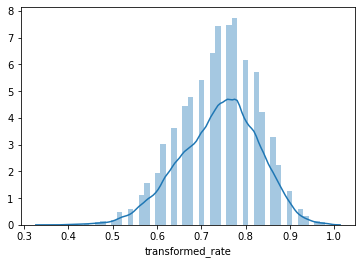

In [29]:
sns.distplot(df.transformed_rate)

We can see that we have a peak between 0.7 and 0.8. This is expected given the mean of 0.74.

Let's see if there is any correlation between our numeric values: number of votes, cost and rate.

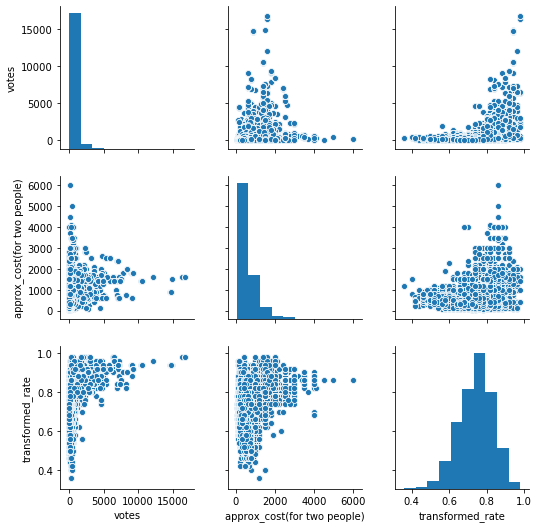

In [30]:
sns.pairplot(df)

In [31]:
df.corr()

,votes,approx_cost(for two people),transformed_rate
votes,1.000000,0.366556,0.435256
approx_cost(for two people),0.366556,1.000000,0.385384
transformed_rate,0.435256,0.385384,1.000000


As it is possible to see, there only seems to exist a weak correlation between all values, with the strongest one being between the rate and the number of votes.
This could imply a small tendency for people to want to vote when they had a very good experience.

Let's check if our other labels have some effect in this rate.

#### **Online Order**

Text(0.5, 1.0, 'Rating by online order possibility')

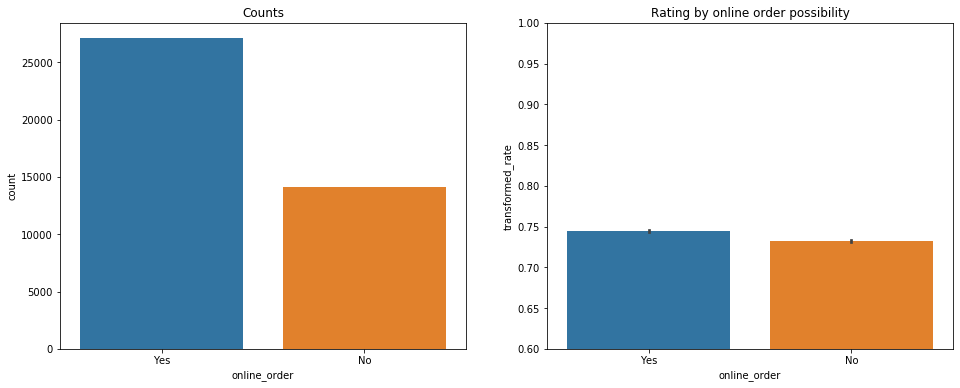

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
s0 = sns.countplot(df.online_order, ax=axs[0])
s0.set_title("Counts")
s1 = sns.barplot(x="online_order", y = "transformed_rate", data=df, ax=axs[1])
s1.set_ylim(0.6, 1)
s1.set_title("Rating by online order possibility")

We can see that the rating of a restaurant appears to be affected by the possibility of online order, even if the difference is very small.

#### **Book table**

Text(0.5, 1.0, 'Rating by book table service')

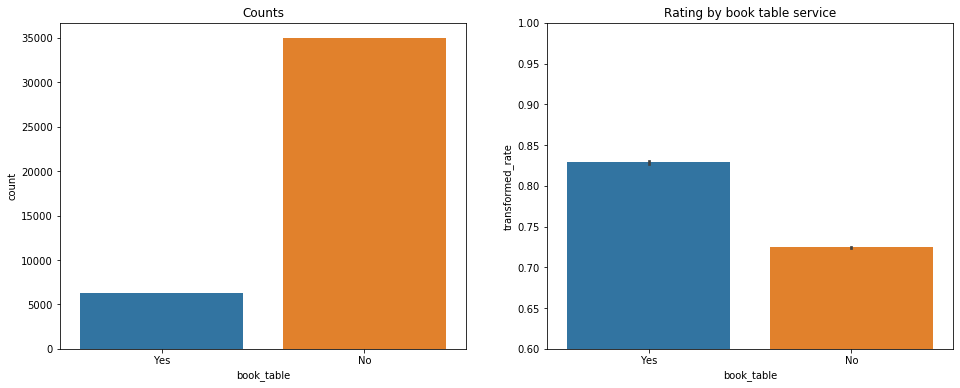

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
s0 = sns.countplot(df.book_table, ax=axs[0])
s0.set_title("Counts")
s1 = sns.barplot(x="book_table", y = "transformed_rate", data=df, ax=axs[1])
s1.set_ylim(0.6, 1)
s1.set_title("Rating by book table service")

We can see that there is quite a big difference between the rating of restaurants that have table reservation and those who do not.

#### **Type**

[Text(0, 0, 'Buffet'),
 Text(0, 0, 'Cafes'),
 Text(0, 0, 'Delivery'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Dine-out'),
 Text(0, 0, 'Drinks & nightlife'),
 Text(0, 0, 'Pubs and bars')]

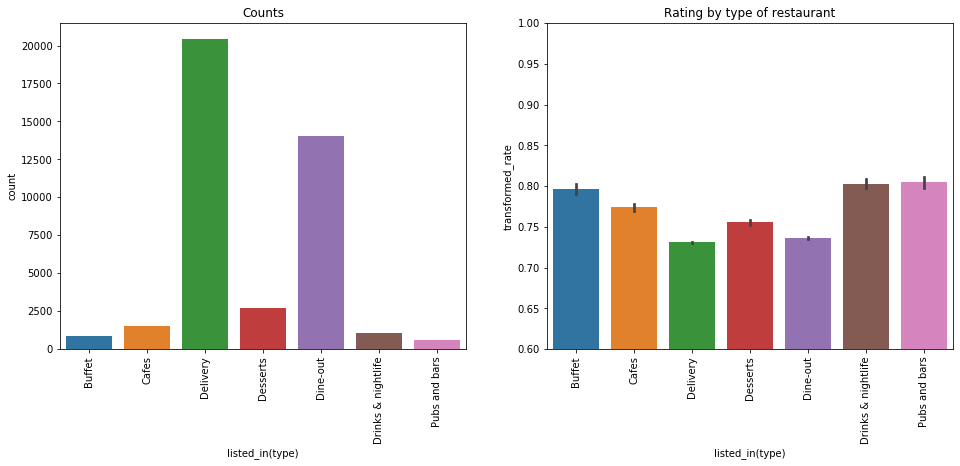

In [34]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
s0 = sns.countplot(df["listed_in(type)"], ax=axs[0])
s0.set_title("Counts")
s1 = sns.barplot(x="listed_in(type)", y = "transformed_rate", data=df, ax=axs[1])
s1.set_ylim(0.6, 1)
s1.set_title("Rating by type of restaurant")
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
s0.set_xticklabels(s0.get_xticklabels(), rotation=90)

We can see that there is a variation between the various types of restaurants, with Buffet, Drinks & Nightlife and Pubs and Bars having the biggest rating and Delivery and Dine-out having the lowest.

#### **City**

[Text(0, 0, 'Banashankari'),
 Text(0, 0, 'Bannerghatta Road'),
 Text(0, 0, 'Basavanagudi'),
 Text(0, 0, 'Bellandur'),
 Text(0, 0, 'Brigade Road'),
 Text(0, 0, 'Brookefield'),
 Text(0, 0, 'BTM'),
 Text(0, 0, 'Church Street'),
 Text(0, 0, 'Electronic City'),
 Text(0, 0, 'Frazer Town'),
 Text(0, 0, 'HSR'),
 Text(0, 0, 'Indiranagar'),
 Text(0, 0, 'Jayanagar'),
 Text(0, 0, 'JP Nagar'),
 Text(0, 0, 'Kalyan Nagar'),
 Text(0, 0, 'Kammanahalli'),
 Text(0, 0, 'Koramangala 4th Block'),
 Text(0, 0, 'Koramangala 5th Block'),
 Text(0, 0, 'Koramangala 6th Block'),
 Text(0, 0, 'Koramangala 7th Block'),
 Text(0, 0, 'Lavelle Road'),
 Text(0, 0, 'Malleshwaram'),
 Text(0, 0, 'Marathahalli'),
 Text(0, 0, 'MG Road'),
 Text(0, 0, 'New BEL Road'),
 Text(0, 0, 'Old Airport Road'),
 Text(0, 0, 'Rajajinagar'),
 Text(0, 0, 'Residency Road'),
 Text(0, 0, 'Sarjapur Road'),
 Text(0, 0, 'Whitefield')]

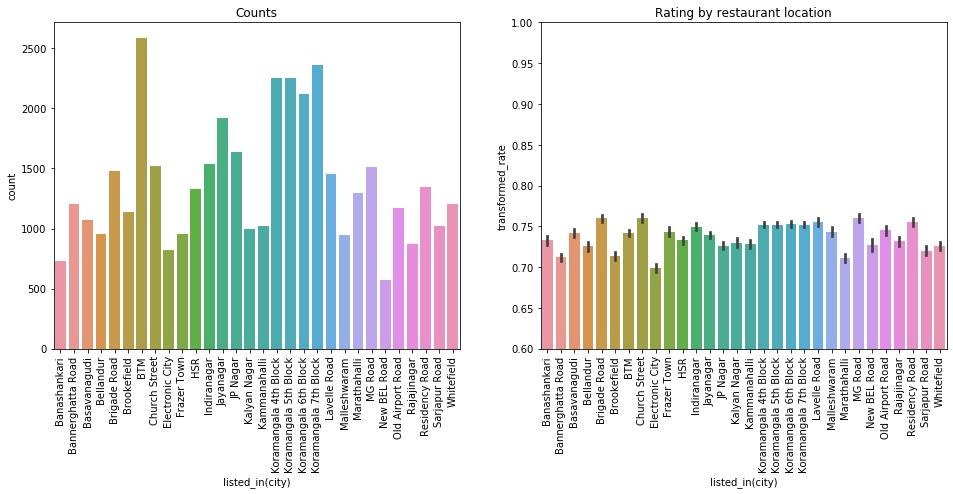

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
s0 = sns.countplot(df["listed_in(city)"], ax=axs[0])
s0.set_title("Counts")
s1 = sns.barplot(x="listed_in(city)", y = "transformed_rate", data=df, ax=axs[1])
s1.set_ylim(0.6, 1)
s1.set_title("Rating by restaurant location")
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
s0.set_xticklabels(s0.get_xticklabels(), rotation=90)

In this case, the ratings that stand out are the lower ones with the restaurants in Electronic City having the lowest ratings overall.

### **Restaurant Rate Prediction**

Let's see if we can use some regression models in order to predict a restaurant rate.

In [81]:
pred_df = df.copy()
pred_df.drop(columns="votes", inplace=True)
pred_df.head()

,online_order,book_table,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate
0,Yes,Yes,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,0.82
1,Yes,No,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,0.82
2,Yes,No,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari,0.76
3,No,No,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari,0.74
4,No,No,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari,0.76


Let's split the lists in rest_type and cuisines

In [82]:
pred_df["rest_type"].head()

0          Casual Dining
1          Casual Dining
2    Cafe, Casual Dining
3            Quick Bites
4          Casual Dining
Name: rest_type, dtype: object

In [83]:
pred_df["rest_type"] = pred_df["rest_type"].apply(lambda x: x.split(", "))
rt = pred_df["rest_type"]
mlb = MultiLabelBinarizer()
rts = pd.DataFrame(mlb.fit_transform(rt), columns=mlb.classes_, index=pred_df.index)
pred_df = pd.concat([pred_df, rts], axis=1)
pred_df.drop(columns="rest_type", inplace=True)
pred_df.head()

,online_order,book_table,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate,Bakery,Bar,Beverage Shop,...,Irani Cafee,Kiosk,Lounge,Meat Shop,Mess,Microbrewery,Pub,Quick Bites,Sweet Shop,Takeaway
0,Yes,Yes,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,0.82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,0.82,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari,0.76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,"South Indian, North Indian",300.0,Buffet,Banashankari,0.74,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,No,No,"North Indian, Rajasthani",600.0,Buffet,Banashankari,0.76,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
pred_df["cuisines"].head()

0    North Indian, Mughlai, Chinese
1       Chinese, North Indian, Thai
2            Cafe, Mexican, Italian
3        South Indian, North Indian
4          North Indian, Rajasthani
Name: cuisines, dtype: object

In [85]:
pred_df["cuisines"] = pred_df["cuisines"].apply(lambda x: x.split(", "))
rt = pred_df["cuisines"]
mlb = MultiLabelBinarizer()
rts = pd.DataFrame(mlb.fit_transform(rt), columns=mlb.classes_, index=pred_df.index)
pred_df = pd.concat([pred_df, rts], axis=1)
pred_df.drop(columns="cuisines", inplace=True)
pred_df.head()

,online_order,book_table,approx_cost(for two people),listed_in(type),listed_in(city),transformed_rate,Bakery,Bar,Beverage Shop,Bhojanalya,...,Sushi,Tamil,Tea,Tex-Mex,Thai,Tibetan,Turkish,Vegan,Vietnamese,Wraps
0,Yes,Yes,800.0,Buffet,Banashankari,0.82,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,800.0,Buffet,Banashankari,0.82,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Yes,No,800.0,Buffet,Banashankari,0.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,300.0,Buffet,Banashankari,0.74,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,600.0,Buffet,Banashankari,0.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's deal with the remaining categorical features now.

In [90]:
pred_df["online_order"] = pred_df.online_order.eq('Yes').mul(1)
pred_df["book_table"] = pred_df.book_table.eq('Yes').mul(1)
pred_df[["online_order","book_table"]].head()

,online_order,book_table
0,1,1
1,1,0
2,1,0
3,0,0
4,0,0


In [91]:
pred_df = pd.get_dummies(pred_df)
pred_df.head()

,online_order,book_table,approx_cost(for two people),transformed_rate,Bakery,Bar,Beverage Shop,Bhojanalya,Cafe,Casual Dining,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,1,800.0,0.82,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,800.0,0.82,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,800.0,0.76,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,300.0,0.74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,600.0,0.76,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


We need to deal with two some duplicated column names.

In [92]:
pred_df.columns[pred_df.columns.duplicated()]

Index(['Bakery', 'Cafe'], dtype='object')

In [93]:
cols_repl = ["Bakery", "Cafe"]
cols = []
count = 1
for column in pred_df.columns:
    if column in cols_repl:
        cols.append(column+str(count))
        count += 1
        continue
    cols.append(column)
pred_df.columns = cols

In [94]:
pred_df.columns.duplicated().sum()

0

Let's split our X and Y and its training and testing dataset.

In [95]:
seed = 6
X = pred_df.drop("transformed_rate", axis=1)
y = pred_df["transformed_rate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed)

Let's test different models using cross-validation in order to find out the best base model without any optimization.

In [96]:
models = {
    "linear": LinearRegression(),
    "ridge": Ridge(),
    "lassi": Lasso(random_state = seed),
    "elastic": ElasticNet(random_state = seed),
    "svr": SVR(gamma="scale"),
    "rforest": RandomForestRegressor(random_state = seed),
    "xgb": xgb.XGBRegressor(random_state = seed)
}

In [97]:
def cross_validation_scores(models, X_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-2):
    results = pd.DataFrame(columns=["Negative Mean Squared Error", "SD"])
    for name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=n_jobs)
        score = scores.mean()
        sd = scores.std()
        results.loc[name, "Negative Mean Squared Error"] = round(score, 4)
        results.loc[name, "SD"] = round(sd, 4)
    return results

In [98]:
cv_results = cross_validation_scores(models, X_train, y_train)

In [99]:
cv_results.style.highlight_max(subset="Negative Mean Squared Error")

,Negative Mean Squared Error,SD
linear,-0.0051,0.0001
ridge,-0.0051,0.0001
lassi,-0.0066,0.0001
elastic,-0.0066,0.0001
svr,-0.0063,0.0001
rforest,-0.0027,0.0001
xgb,-0.0049,0.0002


As we can see the Random Forest Regressor was the best model with a very good score. 
(Note: Using Mean Squared Error, the lowest the score the better so scikit-learn returns its negative in order to use the "best score is the highest" logic.)

In [100]:
rf = RandomForestRegressor(random_state = seed)

In [105]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=6, verbose=0,
                      warm_start=False)

In [106]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)

In [109]:
feature_importances[:10]

,importance
book_table,0.188160
approx_cost(for two people),0.157874
Desserts,0.030401
online_order,0.024166
Chinese,0.021139
North Indian,0.020442
Fast Food,0.019731
South Indian,0.015521
Biryani,0.013684
Quick Bites,0.013324


As expected we can see that the most importance features are the book table service and the cost. This is followed by "Desserts" as the most important cuisine feature, which is interesting.

Let's try to optimize this model now.